# Classification

### Logistic regression

In [1]:
import sklearn.preprocessing as sk
import numpy as n
import pandas as p
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
path = "./data/"

In [3]:
data = p.read_csv(path+"car_purchase.csv")

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [178]:
x = p.get_dummies(data.iloc[:,1:-1])
y = data.iloc[:,-1:]

In [55]:
x.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1


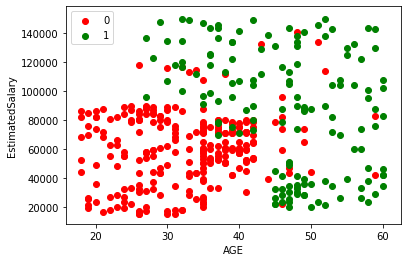

In [51]:
l = ['red','green']
for i in n.unique(y):
    plt.scatter(x[y.iloc[:,0]==i]['Age'],x[y.iloc[:,0]==i]['EstimatedSalary'],color=l[i],label=i)
plt.xlabel("AGE")
plt.ylabel("EstimatedSalary")
plt.legend()

In [56]:
from sklearn.model_selection import train_test_split as t

In [57]:
tr_x,te_x,tr_y,te_y = t(x,y,test_size=0.25)

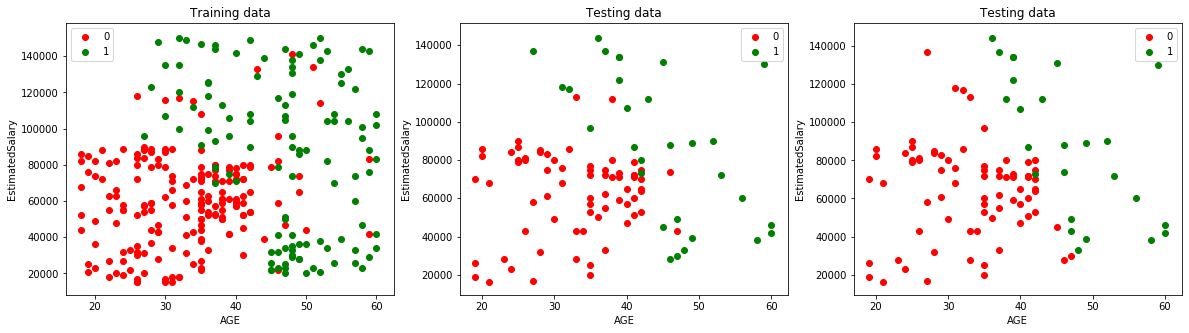

In [216]:
l = ['red','green']
g = ['blue','black']
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
for i in n.unique(y):
    plt.scatter(tr_x[tr_y.iloc[:,0]==i]['Age'],tr_x[tr_y.iloc[:,0]==i]['EstimatedSalary'],color=l[i],label=i)
plt.title("Training data")
plt.xlabel("AGE")
plt.ylabel("EstimatedSalary")
plt.legend()
plt.subplot(1,3,2)
for i in n.unique(y):
    plt.scatter(te_x[te_y.iloc[:,0]==i]['Age'],te_x[te_y.iloc[:,0]==i]['EstimatedSalary'],color=l[i],label=i)
plt.title("Testing data")
plt.xlabel("AGE")
plt.ylabel("EstimatedSalary")
plt.legend()

plt.subplot(1,3,3)
for j in n.unique(cls_reg.predict(te_x)):
    plt.scatter(p.DataFrame(te_x.values)[yy.iloc[:,0]==j][0],p.DataFrame(te_x.values)[yy.iloc[:,0]==j][1],color=l[j],label=j)
plt.title("Testing data")
plt.xlabel("AGE")
plt.ylabel("EstimatedSalary")
plt.legend()


In [67]:
from sklearn import linear_model as lm

In [115]:
cls_reg = lm.LogisticRegression(max_iter=100000,tol=0.00001,random_state=0)

In [116]:
cls_reg.fit(tr_x,tr_y.values.flatten())

c:\users\sonu\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=1e-05, verbose=0,
                   warm_start=False)

In [117]:
cls_reg.score(tr_x,tr_y)

0.84

In [168]:
te_y

,Purchased
178,0
162,0
153,0
1,0
12,0
...,...
44,0
154,0
286,0
370,1


In [177]:
yy = p.DataFrame(cls_reg.predict(te_x))

In [214]:
p.DataFrame(te_x.values)[yy.iloc[:,0]==0]

,0,1,2,3
0,24,23000,0,1
1,37,33000,1,0
2,36,50000,1,0
3,35,20000,0,1
4,20,86000,0,1
...,...,...,...,...
94,31,68000,1,0
95,28,84000,1,0
96,40,47000,0,1
97,37,62000,1,0


In [209]:
yy.shape

(100, 1)

In [212]:
te_x.shape

(100, 4)